In [1]:
libraries = c("dplyr", "ggplot2")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE,quietly=TRUE) }

theme_set(theme_minimal(base_size=12)) 

print(R.Version()$version.string)

[1] "R version 4.0.0 (2020-04-24)"


# Loading the dataset

In [3]:
df = read.csv("../data/日本データCOVID19 (200510).csv") %>% 
    mutate(発症日 = as.Date(発症日), 診断日 = as.Date(診断日), 報告日 = as.Date(報告日))

# Epidemic curve by illness onset

In [4]:
df %>% filter(!is.na(発症日)) -> df_

print(paste0("Total number of cases with unknown date of illness onset: ", nrow(df_)))

[1] "Total number of cases with unknown date of illness onset: 12526"


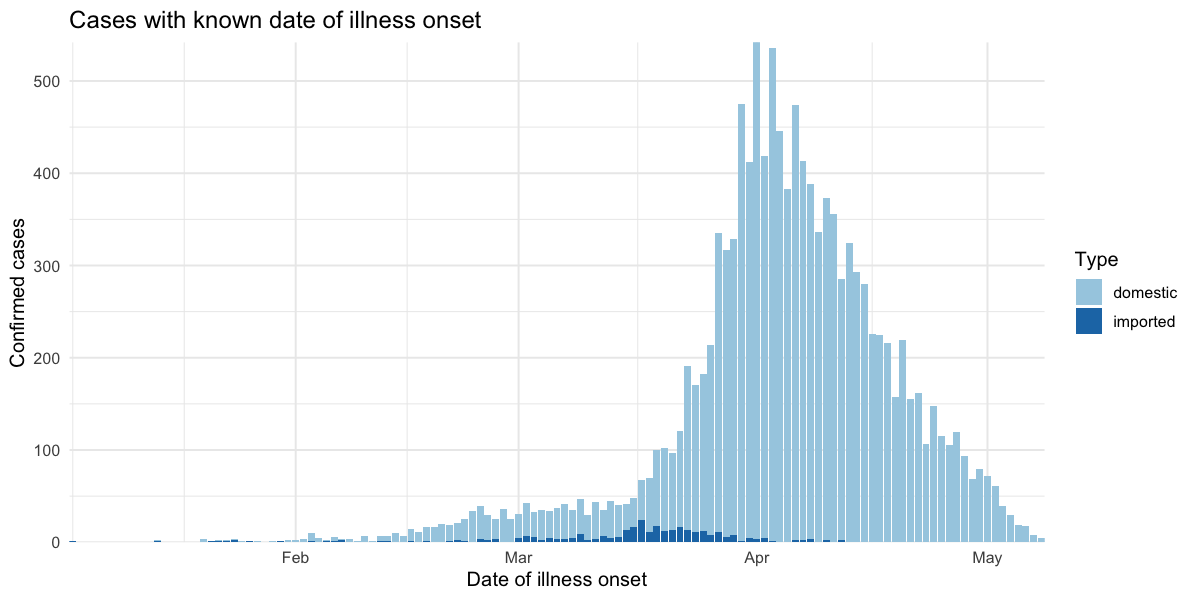

In [5]:
ymax = max(df_ %>% mutate(count=1) %>% group_by(発症日) %>% summarize(count=sum(count)) %>% .$count)

options(repr.plot.width=10,repr.plot.height=5)
ggplot() + 
    geom_bar(data = df_, aes(x=発症日, fill=持ち込み症例)) +
    coord_cartesian(expand=0) +
    scale_fill_brewer(palette = "Paired") +
    ylim(c(0,ymax)) +
    labs(x="Date of illness onset", y="Confirmed cases", fill = "Type", title="Cases with known date of illness onset")

# Cases with unknown date of illness onset

In [6]:
df %>% filter(is.na(発症日)) -> df_

print(paste0("Total number of cases with unknown date of illness onset: ", nrow(df_)))

[1] "Total number of cases with unknown date of illness onset: 2872"


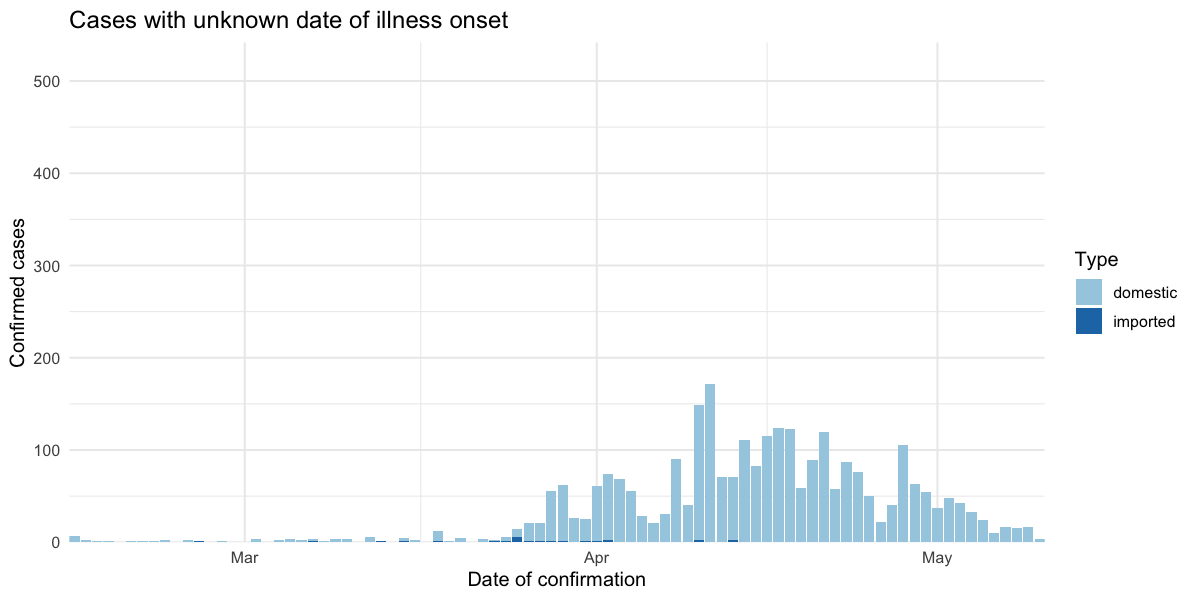

In [7]:
options(repr.plot.width=10,repr.plot.height=5)
ggplot() + 
    geom_bar(data = df_ %>% mutate(known_event = if_else(is.na(診断日), 報告日, 診断日)), 
                                   aes(x=known_event, fill=持ち込み症例)) +
    coord_cartesian(expand=0) +
    scale_fill_brewer(palette = "Paired") +
    ylim(c(0,ymax)) +
    labs(x="Date of confirmation",
         y="Confirmed cases", fill = "Type", 
         title="Cases with unknown date of illness onset")